In [1]:
# 데이터 분석 관련 라이브러리
import pandas as pd  # 데이터 프레임 처리
import numpy as np  # 배열, 행렬 연산

# 시각화 관련 라이브러리
import matplotlib.pyplot as plt  # 기본적인 시각화
import seaborn as sns  # 고급 시각화
import matplotlib.font_manager as fm  # 폰트 설정
from matplotlib import rcParams  # 설정 관리

# 맥북에서 한글 설정 (matplotlib에서 한글 깨짐 방지)
plt.rcParams['font.family'] = 'AppleGothic'  # 맥북에서 기본 한글 폰트 적용
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 머신러닝 관련 라이브러리
from sklearn.model_selection import train_test_split  # 데이터 분할
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # 스케일러
from sklearn.linear_model import LinearRegression, LogisticRegression  # 선형 회귀, 로지스틱 회귀
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor  # 결정 트리
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor  # 랜덤 포레스트
from sklearn.svm import SVC, SVR  # 서포트 벡터 머신
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report  # 성능 평가

# 통계 관련 라이브러리
import statsmodels.api as sm  # 통계 모델링
import scipy.stats as stats  # 통계 함수

# 기타 라이브러리
import os  # 운영체제 관련 기능
import sys  # 시스템 관련 기능
import re  # 정규 표현식
import json  # JSON 파일 처리
import datetime  # 날짜 및 시간 처리
import pickle  # 객체 직렬화 및 역직렬화
import requests  # HTTP 요청
import random  # 난수 생성
import math  # 수학 함수


In [ ]:

# import os
# import pandas as pd

# # 파일이 있는 폴더와 저장할 폴더 경로 설정
# input_folder = '/Users/parkjunhyeok/콤파스_크롤링_전처리및상권정보가공/성남시매물데이터전처리'
# output_folder = '/Users/parkjunhyeok/콤파스_크롤링_전처리및상권정보가공/성남시부동산매물데이터_컬럼및전처리'

# # 저장할 폴더가 없으면 생성
# os.makedirs(output_folder, exist_ok=True)

# # 폴더 내 모든 csv 파일을 읽고 전처리한 후 저장하는 코드
# for file_name in os.listdir(input_folder):
#     if file_name.endswith('.csv'):
#         # CSV 파일 읽기
#         file_path = os.path.join(input_folder, file_name)
#         df = pd.read_csv(file_path)
        
#         # 공급면적, 전용면적, 현재층, 총층을 추출하는 함수
#         def extract_areas_and_floors(area_str):
#             area_str = area_str.split(', ')
#             supply_area, exclusive_area = area_str[0].split('/')
#             current_floor, total_floors = area_str[1].split('/')
#             return supply_area, exclusive_area, current_floor, total_floors

#         # 가격에서 보증금과 월세를 추출하는 함수
#         def extract_deposit_and_rent(price_str):
#             if '억' in price_str:  # 매매인 경우
#                 return price_str, None  # 매매가로 설정, 월세는 없음
#             else:
#                 parts = price_str.split('/')
#                 if len(parts) == 2:
#                     return parts[0], parts[1]  # 보증금과 월세
#                 else:
#                     return price_str, None  # 월세가 없는 경우

#         # 공급면적, 전용면적, 현재층, 총층 컬럼 추가
#         df[['공급면적', '전용면적', '현재층', '총층']] = df['면적 및 층수'].apply(lambda x: pd.Series(extract_areas_and_floors(x)))

#         # 공급종류, 보증금, 월세 컬럼 추가
#         df['공급종류'] = df['가격'].apply(lambda x: '매매' if '억' in x else '월세')
#         df[['보증금', '월세']] = df['가격'].apply(lambda x: pd.Series(extract_deposit_and_rent(x)))

#         # 매매인 경우 보증금과 월세를 NaN으로 설정하고, 매매가 컬럼을 추가
#         df['보증금'] = df.apply(lambda row: np.nan if row['공급종류'] == '매매' else row['보증금'], axis=1)
#         df['월세'] = df.apply(lambda row: np.nan if row['공급종류'] == '매매' else row['월세'], axis=1)

#         # 매매가 컬럼 추가
#         df['매매가'] = df.apply(lambda row: row['가격'] if row['공급종류'] == '매매' else np.nan, axis=1)
        
#         # '전용면적'에서 숫자만 남기고 제곱기호(²) 제거
#         df['전용면적'] = df['전용면적'].apply(lambda x: ''.join(filter(str.isdigit, str(x))))
#         df['전용면적'] = df['전용면적'].str.replace('²', '', regex=False)
        
#         # '총층'에서 지하층(B1, B2 등)을 포함하여 숫자만 남기고 나머지 문자열 제거
#         df['총층'] = df['총층'].apply(lambda x: ''.join(filter(str.isdigit, str(x))) if 'B' not in str(x) else str(x))
        
#         # 전처리된 데이터 CSV로 저장
#         output_file_path = os.path.join(output_folder, file_name)
#         df.to_csv(output_file_path, index=False)

# output_folder


'/Users/parkjunhyeok/콤파스_크롤링_전처리및상권정보가공/성남시부동산매물데이터_컬럼및전처리'

### 모든 매물데이터 concat

In [ ]:
# # 전처리된 전체 파일이 있는 폴더 경로 설정
# processed_folder = '/Users/parkjunhyeok/콤파스_크롤링_전처리및상권정보가공/부동산매물데이터_컬럼및전처리'

# # 폴더 내 모든 CSV 파일을 읽고 하나의 DataFrame으로 합치기
# all_files = [file for file in os.listdir(processed_folder) if file.endswith('.csv')]

# # 각 파일을 읽어와서 하나의 리스트로 저장
# dfs = []
# for file_name in all_files:
#     file_path = os.path.join(processed_folder, file_name)
#     df = pd.read_csv(file_path)
#     dfs.append(df)

# # 리스트에 저장된 DataFrame을 하나로 합치기
# merged_df = pd.concat(dfs, ignore_index=True)

# merged_df


,이름,가격,면적 및 층수,센터명칭,공급면적,전용면적,현재층,총층,공급종류,보증금,월세,매매가
0,지식산업센터,500/45,"238/144m², 5/12층",-,238,144,5,12,월세,500,45.0,NaN
1,지식산업센터,"3억 4,000","238/144m², 7/12층",-,238,144,7,12,매매,NaN,NaN,"3억 4,000"
2,지식산업센터,"1,500/140","238/144m², 7/12층",-,238,144,7,12,월세,"1,500",140.0,NaN
3,지식산업센터,"1,300/130","238/144m², 5/12층",-,238,144,5,12,월세,"1,300",130.0,NaN
4,지식산업센터,"5,660/566","667/485m², 5/6층",오전동 150-24 공장 ((주)에이엘티),667,485,5,6,월세,"5,660",566.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
598,지식산업센터,"1,000/90","142/71m², 13/14층",에이스 하이테크시티군포,142,71,13,14,월세,"1,000",90.0,NaN
599,지식산업센터,800/80,"122/61m², 13/14층",에이스 하이테크시티군포,122,61,13,14,월세,800,80.0,NaN
600,지식산업센터,"2,000/180","340/209m², 5/12층",한솔테크노타운,340,209,5,12,월세,"2,000",180.0,NaN
601,지식산업센터,"2,500/250","438/298m², 6/8층",금봉테크노벨리아파트형공장,438,298,6,8,월세,"2,500",250.0,NaN


In [2]:
merged_df = pd.read_csv('/Users/parkjunhyeok/콤파스_크롤링_전처리및상권정보가공/부천시/부천시_부동산_매물데이터_전처리.csv')

In [4]:
merged_df['매매가'].value_counts()

매매가
4억          15
1억 2,000    13
2억 5,000    12
3억 2,000     7
4억 5,000     7
            ..
9억 5,000     1
1억 8,500     1
2억 1,500     1
3억 3,000     1
130억         1
Name: count, Length: 89, dtype: int64

In [5]:
merged_df

,이름,가격,면적 및 층수,센터명칭,공급면적,전용면적,현재층,총층,공급종류,보증금,월세,매매가
0,지식산업센터,500/40,"73/36m², 7/10층",더플랫폼R,73,36,7,10,월세,500,40.0,NaN
1,지식산업센터,"2,000/150","184/92m², 2/10층",더플랫폼R,184,92,2,10,월세,"2,000",150.0,NaN
2,지식산업센터,500/40,"81/41m², 4/10층",더플랫폼R,81,41,4,10,월세,500,40.0,NaN
3,지식산업센터,"1,200/120","216/108m², 7/10층",광양프런티어밸리5차지식산업센터,216,108,7,10,월세,"1,200",120.0,NaN
4,지식산업센터,200/25,"40/22m², B2/10층",더플랫폼R,40,22,B2,10,월세,200,25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
742,지식산업센터,"2,714/226","359/201m², 4/7층",정보없음,359,201,4,7,월세,"2,714",226.0,NaN
743,지식산업센터,"2,000/120","207/107m², 2/7층",정보없음,207,107,2,7,월세,"2,000",120.0,NaN
744,지식산업센터,"2,700/226","359/187m², 4/7층",정보없음,359,187,4,7,월세,"2,700",226.0,NaN
745,지식산업센터,"1,440/120","139/72m², 7/7층",정보없음,139,72,7,7,월세,"1,440",120.0,NaN


In [118]:
# merged_df.to_csv('./의왕_군포시_데이터_1차가공.csv', index=False, encoding='utf-8-sig')

In [6]:
부천시_데이터_1차가공 = merged_df.copy()

### 지산데이터랑 지산매물데이터랑 합치기 (공실률이랑 관계를 보기 위한)

In [ ]:
지산데이터 = pd.read_csv('./부천시지산.csv', encoding='utf-8-sig')

In [8]:
지산데이터['지식산업센터명칭'].value_counts()

지식산업센터명칭
(주)두성기계연구            1
BK테크노밸리              1
서림테크노파크 3차           1
서림테크노파크II            1
서림테크노파크Ⅰ             1
서영 아너시티2             1
송내테크노밸리              1
송림벨리타운               1
신중동 더퍼스트 지식산업센터      1
신한테크노벨리              1
옥길테크노벨리              1
와이제니스파크              1
우성테크노파크              1
우정테크노벨리              1
원일테크노                1
원일테크노Ⅱ               1
웹툰융합센터               1
은성테크노                1
은하테크노                1
인철테크노밸리              1
인철테크노밸리2차            1
진택하이테크밸리             1
춘의디아크원               1
춘의테크노파크              1
춘의테크노파크3차            1
삼보테크노타워              1
비즈타워                 1
부천테크노파크제4단지          1
대우테크노타운              1
고산테크노벨리              1
골든IT타워               1
광양프런티어밸리 7차          1
광양프런티어밸리5차지식산업센터     1
구심이엔지                1
남성산업㈜                1
뉴테크노타운               1
다온테크노벨리              1
다우테크노타운              1
다우테크노타운Ⅱ             1
대우테크노파크              1
부천테크노파크제3단지          1
대원빌딩                 1
덕성빌딩                 1
디클

In [10]:
부천시_데이터_1차가공['센터명칭'].value_counts()

센터명칭
정보없음                166
광양프런티어밸리5차지식산업센터    131
더플랫폼R               127
우성테크노파크Ⅰ             55
신중동더퍼스트지식산업센터        47
부천테크노밸리U1center      41
골든IT타워               37
부천옥길서영아너시티2          35
광양프런티어밸리7차지식산업센터     30
부천테크노파크              26
옥길지식산업센터             25
인철테크노밸리              11
y-제니스파크               8
부천테크노월드               3
원일테크노                 2
진택하이테크밸리              1
고산테크노밸리               1
다온테크노밸리               1
Name: count, dtype: int64

### 지식산업명칭 전처리

In [11]:
# 변경할 이름 매핑 딕셔너리 생성
rename_dict = {
    "광양프런티어밸리5차지식산업센터": "광양프런티어밸리5차",
    "광양프런티어밸리7차지식산업센터": "광양프런티어밸리7차",
    "우성테크노파크Ⅰ": "우성테크노파크",
    "신중동더퍼스트지식산업센터": "신중동더퍼스트지식산업센터",
    "부천테크노밸리U1center": "부천테크노밸리U1센터",
    "골든IT타워": "골든IT타워",
    "부천옥길서영아너시티2": "서영아너시티2",
    "부천테크노파크": "부천테크노파크",
    "옥길지식산업센터": "옥길테크노벨리",
    "인철테크노밸리": "인철테크노밸리",
    "y-제니스파크": "와이제니스파크",
    "부천테크노월드": "부천테크노월드",
    "원일테크노": "원일테크노",
    "진택하이테크밸리": "진택하이테크밸리",
    "고산테크노밸리": "고산테크노밸리",
    "다온테크노밸리": "다온테크노밸리"
}

# 데이터프레임의 센터명칭 컬럼 변경 적용
부천시_데이터_1차가공["센터명칭"] = 부천시_데이터_1차가공["센터명칭"].replace(rename_dict)



In [12]:
부천시_데이터_1차가공['센터명칭'].value_counts()


센터명칭
정보없음             166
광양프런티어밸리5차       131
더플랫폼R            127
우성테크노파크           55
신중동더퍼스트지식산업센터     47
부천테크노밸리U1센터       41
골든IT타워            37
서영아너시티2           35
광양프런티어밸리7차        30
부천테크노파크           26
옥길테크노벨리           25
인철테크노밸리           11
와이제니스파크            8
부천테크노월드            3
원일테크노              2
진택하이테크밸리           1
고산테크노밸리            1
다온테크노밸리            1
Name: count, dtype: int64

### 머지하기 

In [13]:
# 3. 두 데이터프레임 병합 (의왕_군포시_데이터_1차가공의 '센터명칭'과 지산데이터의 '지식산업센터명칭'을 기준)
부천시_데이터_1차가공 = 부천시_데이터_1차가공.merge(
    지산데이터,
    left_on='센터명칭',
    right_on='지식산업센터명칭',
    how='left'  # 혹은 'inner' 등 상황에 맞게 선택
)

In [14]:
부천시_데이터_1차가공.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   이름           747 non-null    object 
 1   가격           747 non-null    object 
 2   면적 및 층수      747 non-null    object 
 3   센터명칭         747 non-null    object 
 4   공급면적         747 non-null    int64  
 5   전용면적         747 non-null    int64  
 6   현재층          747 non-null    object 
 7   총층           747 non-null    int64  
 8   공급종류         747 non-null    object 
 9   보증금          520 non-null    object 
 10  월세           514 non-null    float64
 11  매매가          227 non-null    object 
 12  시군명          142 non-null    object 
 13  지식산업센터명칭     142 non-null    object 
 14  위도           142 non-null    float64
 15  경도           142 non-null    float64
 16  소재지지번주소      142 non-null    object 
 17  소재지도로명주소     142 non-null    object 
 18  용도지역         142 non-null    object 
 19  부지면적(㎡) 

In [15]:
# 데이터프레임에서 개수가 0인 컬럼 삭제
columns_to_drop = [
    "부지면적(㎡)", "층수(지하/지상)", "공장시설면적(㎡)", "기타산업시설면적(㎡)",
    "지원시설면적(㎡)", "공동시설면적(㎡)", "공장동수", "분양형태", "준공일자"
]

# 중복된 컬럼 제거 (동일한 의미를 가진 컬럼이 있으면 하나만 유지)
deduplicated_df = 부천시_데이터_1차가공.drop(columns=columns_to_drop)

# '_x', '_y' 접미사 제거하여 컬럼명 정리
deduplicated_df.columns = [col.replace('_x', '').replace('_y', '') for col in deduplicated_df.columns]
부천시_데이터_1차가공 = deduplicated_df.copy()

In [17]:
# 공실률데이터가 nan인 경우 그 행 삭제

부천시_데이터_1차가공 = 부천시_데이터_1차가공.dropna(subset=['공실률'])

In [18]:
부천시_데이터_1차가공.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, 7 to 739
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   이름        142 non-null    object 
 1   가격        142 non-null    object 
 2   면적 및 층수   142 non-null    object 
 3   센터명칭      142 non-null    object 
 4   공급면적      142 non-null    int64  
 5   전용면적      142 non-null    int64  
 6   현재층       142 non-null    object 
 7   총층        142 non-null    int64  
 8   공급종류      142 non-null    object 
 9   보증금       104 non-null    object 
 10  월세        104 non-null    float64
 11  매매가       38 non-null     object 
 12  시군명       142 non-null    object 
 13  지식산업센터명칭  142 non-null    object 
 14  위도        142 non-null    float64
 15  경도        142 non-null    float64
 16  소재지지번주소   142 non-null    object 
 17  소재지도로명주소  142 non-null    object 
 18  용도지역      142 non-null    object 
 19  건축면적(㎡)   142 non-null    float64
 20  유치가능업체수   142 non-null    float64
 21

In [ ]:
# # 데이터에서 Null 값이 많은 컬럼 제거 (_x, _y 중복 컬럼 포함)
# columns_to_drop = [
#     "매매가", "준공일자_x", "부지면적(㎡)", "층수(지하/지상)", "공장시설면적(㎡)", "기타산업시설면적(㎡)",
#     "지원시설면적(㎡)", "공동시설면적(㎡)", "공장동수", "분양형태", "준공일자_y"
# ]

# # 컬럼 이름 정리 (_x, _y 제거)
# cleaned_df = 부천시_데이터_1차가공.drop(columns=columns_to_drop)

# # '_x', '_y' 접미사 제거
# cleaned_df.columns = [col.replace('_x', '').replace('_y', '') for col in cleaned_df.columns]
# 부천시_데이터_1차가공 = cleaned_df.copy()


In [19]:
부천시_데이터_1차가공['보증금'].value_counts()

보증금
500      49
1,000    32
7,050     3
2,000     2
6,925     2
4,000     2
200       2
3,000     1
2,300     1
1,500     1
350       1
300       1
6,920     1
3,680     1
6,900     1
7,000     1
4,513     1
3,682     1
4,400     1
Name: count, dtype: int64

### 컬럼들 정제

In [20]:
import pandas as pd
import numpy as np

# 날짜형 컬럼 변환
date_cols = ['허가일자', '착공일자', '준공일자', '사용승인일', '데이터기준일자']
for col in date_cols:
    if col in 부천시_데이터_1차가공.columns:
        부천시_데이터_1차가공[col] = pd.to_datetime(부천시_데이터_1차가공[col], errors='coerce')

# 가격 컬럼 변환 (예: "9억" → 900,000,000)
def convert_price(price):
    if pd.isnull(price):
        return price
    if isinstance(price, str):
        price = price.strip().replace(',', '')  # 콤마 제거
        if price.endswith('억'):
            try:
                num = float(price.replace('억', '').strip())
                return num * 100000000
            except:
                return np.nan
        try:
            return float(price)
        except:
            return np.nan
    return price

if '가격' in 부천시_데이터_1차가공.columns:
    부천시_데이터_1차가공['가격'] = 부천시_데이터_1차가공['가격'].apply(convert_price)

# 숫자로 변환할 컬럼들
numeric_cols = ['공급면적', '전용면적', '현재층', '총층', '입주업체수', '공장동수', '공실률', '보증금']
for col in numeric_cols:
    if col in 부천시_데이터_1차가공.columns:
        부천시_데이터_1차가공[col] = 부천시_데이터_1차가공[col].astype(str).str.replace(',', '', regex=True)
        부천시_데이터_1차가공[col] = pd.to_numeric(부천시_데이터_1차가공[col], errors='coerce')



/var/folders/j6/q47by8d57xv9mxr1cgqzpp_w0000gn/T/ipykernel_41565/2967238022.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  부천시_데이터_1차가공[col] = pd.to_datetime(부천시_데이터_1차가공[col], errors='coerce')
/var/folders/j6/q47by8d57xv9mxr1cgqzpp_w0000gn/T/ipykernel_41565/2967238022.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  부천시_데이터_1차가공[col] = pd.to_datetime(부천시_데이터_1차가공[col], errors='coerce')
/var/folders/j6/q47by8d57xv9mxr1cgqzpp_w0000gn/T/ipykernel_41565/2967238022.py:8: SettingWithCopyWarning: 
A value

### 평당 월세 , 평수계산 , 연면적계산


In [21]:

pd.set_option('display.max_columns', None)
부천시_데이터_1차가공.head()

,이름,가격,면적 및 층수,센터명칭,공급면적,전용면적,현재층,총층,공급종류,보증금,월세,매매가,시군명,지식산업센터명칭,위도,경도,소재지지번주소,소재지도로명주소,용도지역,건축면적(㎡),유치가능업체수,입주업체수,공사진행상황,허가일자,착공일자,사용승인일,데이터기준일자,공실률
7,지식산업센터,NaN,"80/39m², 4/10층",골든IT타워,80,39,4.0,10,월세,500.0,43.0,NaN,부천시,골든IT타워,37.466900,126.826617,경기도 부천시 소사구 옥길동 794-3번지,경기도 부천시 소사구 양지로 229,준주거,36843.89,531.0,531.0,준공,2019-05-15,2019-10-19,2022-02-18,2024-05-31,0.0
8,지식산업센터,NaN,"81/39m², 8/10층",우성테크노파크,81,39,8.0,10,월세,500.0,45.0,NaN,부천시,우성테크노파크,37.467649,126.825253,경기도 부천시 소사구 옥길동 794-1번지,경기도 부천시 소사구 부광로 220,준주거,45554.40,538.0,538.0,준공,2018-11-22,2018-12-31,2020-11-03,2024-05-31,0.0
9,지식산업센터,NaN,"80/39m², 9/10층",우성테크노파크,80,39,9.0,10,월세,500.0,40.0,NaN,부천시,우성테크노파크,37.467649,126.825253,경기도 부천시 소사구 옥길동 794-1번지,경기도 부천시 소사구 부광로 220,준주거,45554.40,538.0,538.0,준공,2018-11-22,2018-12-31,2020-11-03,2024-05-31,0.0
11,지식산업센터,NaN,"102/50m², 6/10층",우성테크노파크,102,50,6.0,10,월세,1000.0,55.0,NaN,부천시,우성테크노파크,37.467649,126.825253,경기도 부천시 소사구 옥길동 794-1번지,경기도 부천시 소사구 부광로 220,준주거,45554.40,538.0,538.0,준공,2018-11-22,2018-12-31,2020-11-03,2024-05-31,0.0
16,지식산업센터,NaN,"169/83m², 6/10층",우성테크노파크,169,83,6.0,10,월세,1000.0,90.0,NaN,부천시,우성테크노파크,37.467649,126.825253,경기도 부천시 소사구 옥길동 794-1번지,경기도 부천시 소사구 부광로 220,준주거,45554.40,538.0,538.0,준공,2018-11-22,2018-12-31,2020-11-03,2024-05-31,0.0


In [22]:

# # 공급면적을 평(㎡ -> 평)으로 변환 (1평 = 3.3058㎡)
부천시_데이터_1차가공["공급면적(평)"] = 부천시_데이터_1차가공["공급면적"] / 3.3058

# 전용면적을 평으로 변환
부천시_데이터_1차가공["전용면적(평)"] = 부천시_데이터_1차가공["전용면적"] / 3.3058

# 연면적 계산 (건축면적 * 총층)
부천시_데이터_1차가공["연면적(㎡)"] = 부천시_데이터_1차가공["건축면적(㎡)"] * 부천시_데이터_1차가공["총층"]
부천시_데이터_1차가공["연면적(평)"] = 부천시_데이터_1차가공["연면적(㎡)"] / 3.3058

# 평당 월 임대료 계산 (월세 / 공급면적(평)), 월세 데이터가 존재하지 않으므로 임의 값 설정 필요
부천시_데이터_1차가공["평당 월 임대료"] = 부천시_데이터_1차가공["월세"] / 부천시_데이터_1차가공["공급면적"]


/var/folders/j6/q47by8d57xv9mxr1cgqzpp_w0000gn/T/ipykernel_41565/1512103891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  부천시_데이터_1차가공["공급면적(평)"] = 부천시_데이터_1차가공["공급면적"] / 3.3058
/var/folders/j6/q47by8d57xv9mxr1cgqzpp_w0000gn/T/ipykernel_41565/1512103891.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  부천시_데이터_1차가공["전용면적(평)"] = 부천시_데이터_1차가공["전용면적"] / 3.3058
/var/folders/j6/q47by8d57xv9mxr1cgqzpp_w0000gn/T/ipykernel_41565/1512103891.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [23]:
부천시_데이터_1차가공.head()

,이름,가격,면적 및 층수,센터명칭,공급면적,전용면적,현재층,총층,공급종류,보증금,월세,매매가,시군명,지식산업센터명칭,위도,경도,소재지지번주소,소재지도로명주소,용도지역,건축면적(㎡),유치가능업체수,입주업체수,공사진행상황,허가일자,착공일자,사용승인일,데이터기준일자,공실률,공급면적(평),전용면적(평),연면적(㎡),연면적(평),평당 월 임대료
7,지식산업센터,NaN,"80/39m², 4/10층",골든IT타워,80,39,4.0,10,월세,500.0,43.0,NaN,부천시,골든IT타워,37.466900,126.826617,경기도 부천시 소사구 옥길동 794-3번지,경기도 부천시 소사구 양지로 229,준주거,36843.89,531.0,531.0,준공,2019-05-15,2019-10-19,2022-02-18,2024-05-31,0.0,24.199891,11.797447,368438.9,111452.265715,0.537500
8,지식산업센터,NaN,"81/39m², 8/10층",우성테크노파크,81,39,8.0,10,월세,500.0,45.0,NaN,부천시,우성테크노파크,37.467649,126.825253,경기도 부천시 소사구 옥길동 794-1번지,경기도 부천시 소사구 부광로 220,준주거,45554.40,538.0,538.0,준공,2018-11-22,2018-12-31,2020-11-03,2024-05-31,0.0,24.502390,11.797447,455544.0,137801.439894,0.555556
9,지식산업센터,NaN,"80/39m², 9/10층",우성테크노파크,80,39,9.0,10,월세,500.0,40.0,NaN,부천시,우성테크노파크,37.467649,126.825253,경기도 부천시 소사구 옥길동 794-1번지,경기도 부천시 소사구 부광로 220,준주거,45554.40,538.0,538.0,준공,2018-11-22,2018-12-31,2020-11-03,2024-05-31,0.0,24.199891,11.797447,455544.0,137801.439894,0.500000
11,지식산업센터,NaN,"102/50m², 6/10층",우성테크노파크,102,50,6.0,10,월세,1000.0,55.0,NaN,부천시,우성테크노파크,37.467649,126.825253,경기도 부천시 소사구 옥길동 794-1번지,경기도 부천시 소사구 부광로 220,준주거,45554.40,538.0,538.0,준공,2018-11-22,2018-12-31,2020-11-03,2024-05-31,0.0,30.854861,15.124932,455544.0,137801.439894,0.539216
16,지식산업센터,NaN,"169/83m², 6/10층",우성테크노파크,169,83,6.0,10,월세,1000.0,90.0,NaN,부천시,우성테크노파크,37.467649,126.825253,경기도 부천시 소사구 옥길동 794-1번지,경기도 부천시 소사구 부광로 220,준주거,45554.40,538.0,538.0,준공,2018-11-22,2018-12-31,2020-11-03,2024-05-31,0.0,51.122270,25.107387,455544.0,137801.439894,0.532544


In [24]:
# '매매가' 컬럼 변환: '억' 단위 제거 후 숫자로 변환

부천시_데이터_1차가공["매매가"] = (
    부천시_데이터_1차가공["매매가"]
    .astype(str)  # 문자열로 변환
    .str.replace(" ", "")  # 공백 제거
    .str.replace(",", "")  # 쉼표 제거
    .str.replace("억", "")  # '억' 제거
    .apply(lambda x: float(x) * 1e8 if x.replace(".", "").isdigit() else None)  # 숫자로 변환 (억 단위 처리)
)


# 불필요한 컬럼 제거 (기타산업시설면적, 공동시설면적)
# 부천시_데이터_1차가공.drop(columns=["기타산업시설면적(㎡)", "공동시설면적(㎡)"], inplace=True)

/var/folders/j6/q47by8d57xv9mxr1cgqzpp_w0000gn/T/ipykernel_41565/3230803286.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  부천시_데이터_1차가공["매매가"] = (


In [26]:
부천시_데이터_1차가공.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, 7 to 739
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   이름        142 non-null    object        
 1   가격        2 non-null      float64       
 2   면적 및 층수   142 non-null    object        
 3   센터명칭      142 non-null    object        
 4   공급면적      142 non-null    int64         
 5   전용면적      142 non-null    int64         
 6   현재층       134 non-null    float64       
 7   총층        142 non-null    int64         
 8   공급종류      142 non-null    object        
 9   보증금       104 non-null    float64       
 10  월세        104 non-null    float64       
 11  매매가       38 non-null     float64       
 12  시군명       142 non-null    object        
 13  지식산업센터명칭  142 non-null    object        
 14  위도        142 non-null    float64       
 15  경도        142 non-null    float64       
 16  소재지지번주소   142 non-null    object        
 17  소재지도로명주소  142 non-nul

In [27]:
부천시_데이터_1차가공.drop(columns=['가격', '지식산업센터명칭', '면적 및 층수', '이름', '공급면적', '전용면적'], inplace=True)


/var/folders/j6/q47by8d57xv9mxr1cgqzpp_w0000gn/T/ipykernel_41565/3553518760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  부천시_데이터_1차가공.drop(columns=['가격', '지식산업센터명칭', '면적 및 층수', '이름', '공급면적', '전용면적'], inplace=True)


In [28]:
부천시_데이터_1차가공.head(2)

,센터명칭,현재층,총층,공급종류,보증금,월세,매매가,시군명,위도,경도,소재지지번주소,소재지도로명주소,용도지역,건축면적(㎡),유치가능업체수,입주업체수,공사진행상황,허가일자,착공일자,사용승인일,데이터기준일자,공실률,공급면적(평),전용면적(평),연면적(㎡),연면적(평),평당 월 임대료
7,골든IT타워,4.0,10,월세,500.0,43.0,NaN,부천시,37.466900,126.826617,경기도 부천시 소사구 옥길동 794-3번지,경기도 부천시 소사구 양지로 229,준주거,36843.89,531.0,531.0,준공,2019-05-15,2019-10-19,2022-02-18,2024-05-31,0.0,24.199891,11.797447,368438.9,111452.265715,0.537500
8,우성테크노파크,8.0,10,월세,500.0,45.0,NaN,부천시,37.467649,126.825253,경기도 부천시 소사구 옥길동 794-1번지,경기도 부천시 소사구 부광로 220,준주거,45554.40,538.0,538.0,준공,2018-11-22,2018-12-31,2020-11-03,2024-05-31,0.0,24.502390,11.797447,455544.0,137801.439894,0.555556


In [29]:
부천시_데이터_1차가공.columns

Index(['센터명칭', '현재층', '총층', '공급종류', '보증금', '월세', '매매가', '시군명', '위도', '경도',
       '소재지지번주소', '소재지도로명주소', '용도지역', '건축면적(㎡)', '유치가능업체수', '입주업체수', '공사진행상황',
       '허가일자', '착공일자', '사용승인일', '데이터기준일자', '공실률', '공급면적(평)', '전용면적(평)',
       '연면적(㎡)', '연면적(평)', '평당 월 임대료'],
      dtype='object')

## 결측치 대치

In [31]:
# grouped_df = 의왕_군포시_지산데이터_1차가공데이터_머지_df.groupby(['시군명', '센터명칭']).agg({
#     '보증금': 'max',
#     '월세': 'median',
#     '매매가': 'median',
#     '공급면적(평)': 'mean',
#     '전용면적(평)': 'mean',
#     '현재층': 'mean',
#     '공실률': 'mean',
#     '건축면적(㎡)': 'mean',
#     '연면적(㎡)': 'mean',
#     '평당 월 임대료': 'median'
# }).reset_index()
# 수치형 컬럼: 평균 또는 최대값 적용
numeric_agg = {
    '보증금': 'max',            # 보증금은 최대값
    '월세': 'median',          # 월세는 중앙값
    '매매가': 'median',        # 매매가는 중앙값
    '공급면적(평)': 'mean',     # 공급면적은 평균
    '전용면적(평)': 'mean',     # 전용면적은 평균
    '현재층': 'mean',           # 현재층은 평균
    '공실률': 'mean',       # 공실률은 평균
    '건축면적(㎡)': 'mean',     # 건축면적은 평균
    '연면적(㎡)': 'mean',       # 연면적은 평균
    '평당 월 임대료': 'median'  # 평당 월 임대료는 중앙값
}

# 범주형 및 날짜형 컬럼: 최빈값 적용 (mode)
categorical_cols = ['총층', '공급종류', '위도', '경도', '소재지도로명주소', '용도지역',
                    '유치가능업체수', '입주업체수', '착공일자']

# 그룹화 및 집계 (수치형: 평균 또는 최대값, 범주형: 최빈값)
grouped_df = 부천시_데이터_1차가공.groupby(['시군명', '센터명칭']).agg({
    **numeric_agg,
    **{col: lambda x: x.mode()[0] if not x.mode().empty else np.nan for col in categorical_cols}
}).reset_index()



In [32]:
grouped_df

,시군명,센터명칭,보증금,월세,매매가,공급면적(평),전용면적(평),현재층,공실률,건축면적(㎡),연면적(㎡),평당 월 임대료,총층,공급종류,위도,경도,소재지도로명주소,용도지역,유치가능업체수,입주업체수,착공일자
0,부천시,골든IT타워,1000.0,45.0,1.400000e+12,24.077257,11.911906,5.944444,0.0,36843.89,368438.900000,0.562500,10,월세,37.466900,126.826617,경기도 부천시 소사구 양지로 229,준주거,531.0,531.0,2019-10-19
1,부천시,부천테크노월드,2000.0,190.0,3.500000e+12,88.127937,59.995563,4.000000,0.0,11740.40,70442.400000,0.614758,6,월세,37.510836,126.781472,경기도 부천시 원미구 도약로 287,일반공업,35.0,35.0,2003-05-16
2,부천시,옥길테크노벨리,1000.0,60.0,3.200000e+12,29.959465,14.241636,6.608696,0.0,25209.49,252094.900000,0.632184,10,월세,37.464927,126.812624,경기도 부천시 소사구 범안로219번길 71,준주거,260.0,260.0,2020-12-15
3,부천시,와이제니스파크,4000.0,250.0,6.900000e+12,224.189304,80.615887,2.142857,0.0,14657.31,115426.316250,0.500000,7,월세,37.512926,126.784247,경기도 부천시 원미구 부천로 323,일반공업,50.0,50.0,2003-11-06
4,부천시,우성테크노파크,1000.0,45.0,1.450000e+12,28.863870,14.101937,6.490909,0.0,45554.40,455544.000000,0.555556,10,월세,37.467649,126.825253,경기도 부천시 소사구 부광로 220,준주거,538.0,538.0,2018-12-31
5,부천시,원일테크노,4400.0,440.0,1.300000e+10,778.933995,641.145865,5.500000,0.0,4414.33,28693.145000,0.597826,6,매매,37.528476,126.775689,경기도 부천시 오정구 신흥로511번길 13-38,준주거,10.0,10.0,2016-07-20
6,부천시,인철테크노밸리,7050.0,692.0,NaN,236.526436,143.274355,4.428571,0.0,11894.95,73532.418182,0.850123,6,월세,37.526573,126.769540,경기도 부천시 오정구 석천로 453,일반공업,30.0,30.0,2016-02-20
7,부천시,진택하이테크밸리,NaN,NaN,2.500000e+12,58.684736,32.367354,5.000000,0.0,6452.84,51622.720000,NaN,8,매매,37.525483,126.772572,경기도 부천시 오정구 오정로 110,일반공업,28.0,28.0,2020-03-23


In [35]:
grouped_df['공실률']

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
Name: 공실률, dtype: float64

In [37]:
grouped_df.describe(include='all')

,시군명,센터명칭,보증금,월세,매매가,공급면적(평),전용면적(평),현재층,공실률,건축면적(㎡),연면적(㎡),평당 월 임대료,총층,공급종류,위도,경도,소재지도로명주소,용도지역,유치가능업체수,입주업체수,착공일자
count,8,8,7.000000,7.000000,7.000000e+00,8.000000,8.000000,8.000000,8.0,8.000000,8.000000,7.000000,8.000000,8,8.000000,8.000000,8,8,8.00000,8.00000,8
unique,1,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,8,2,NaN,NaN,NaN
top,부천시,골든IT타워,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,월세,NaN,NaN,경기도 부천시 소사구 양지로 229,준주거,NaN,NaN,NaN
freq,8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,1,4,NaN,NaN,NaN
mean,NaN,NaN,2921.428571,246.000000,2.709000e+12,183.670375,124.706813,5.014435,0.0,19595.951250,176974.349929,0.616135,7.875000,NaN,37.500471,126.793502,NaN,NaN,185.25000,185.25000,2014-12-26 06:00:00
min,NaN,NaN,1000.000000,45.000000,1.300000e+10,24.077257,11.911906,2.142857,0.0,4414.330000,28693.145000,0.500000,6.000000,NaN,37.464927,126.769540,NaN,NaN,10.00000,10.00000,2003-05-16 00:00:00
25%,NaN,NaN,1000.000000,52.500000,1.425000e+12,29.685566,14.206711,4.321429,0.0,10418.510000,65737.480000,0.559028,6.000000,NaN,37.467462,126.774910,NaN,NaN,29.50000,29.50000,2013-01-23 18:00:00
50%,NaN,NaN,2000.000000,190.000000,2.500000e+12,73.406336,46.181459,5.250000,0.0,13276.130000,94479.367216,0.597826,7.500000,NaN,37.511881,126.782859,NaN,NaN,42.50000,42.50000,2017-10-10 00:00:00
75%,NaN,NaN,4200.000000,345.000000,3.350000e+12,227.273587,96.280504,6.081061,0.0,28118.090000,281180.900000,0.623471,10.000000,NaN,37.525755,126.815781,NaN,NaN,327.75000,327.75000,2019-11-27 00:00:00
max,NaN,NaN,7050.000000,692.000000,6.900000e+12,778.933995,641.145865,6.608696,0.0,45554.400000,455544.000000,0.850123,10.000000,NaN,37.528476,126.826617,NaN,NaN,538.00000,538.00000,2020-12-15 00:00:00


<Axes: >

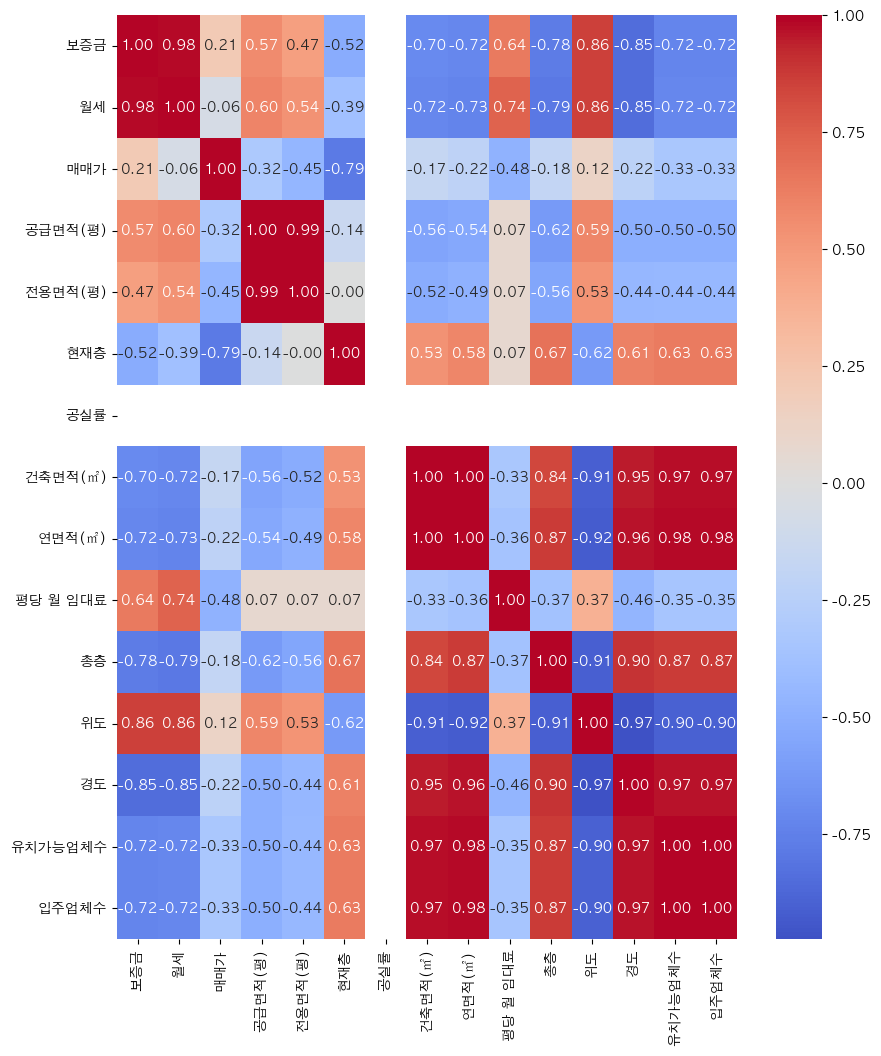

In [36]:
select_df = grouped_df.select_dtypes(include=[np.number])
corr_df = select_df.corr()
plt.figure(figsize=(10, 12))
sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='coolwarm', center=0)

ML을 돌리기에는 너무 적은 데이터이다.

공실률 vs. 매매가/월세
→ 공실률이 낮은 곳이 비싼가? -> 공실률이 높을수록 매매가
지식산업센터별 면적 대비 가격
→ 어떤 센터가 가성비 좋은가?
지역별 (의왕 vs. 군포) 차이
→ 의왕과 군포 중 어디가 임대료가 더 높은가?


In [38]:
grouped_df.to_csv('./부천시_데이터.csv', index=False, encoding='utf-8-sig')